In [1]:
using DelimitedFiles
using Plots
using Dierckx

In [2]:
pyplot()

Plots.PyPlotBackend()

In [6]:
vn_xi_murca_n = readdlm("../output_data/murca_n_vn_over_xi.dat", Float64, comments=true)
vp_xi_murca_n = readdlm("../output_data/murca_n_vp_over_xi.dat", Float64, comments=true)
vn_xi_murca_p = readdlm("../output_data/murca_p_vn_over_xi.dat", Float64, comments=true)
vp_xi_murca_p = readdlm("../output_data/murca_p_vp_over_xi.dat", Float64, comments=true);

In [147]:
Rrate_murca_p = readdlm("../output_data/Rrate_murca_p_SFnp_nonzeroT_logxi_0.8.dat", Float64, comments=true);

In [148]:
Rrate_murca_p_spl = Spline2D(vn_xi_murca_n[:,1], vp_xi_murca_n[:,1], Rrate_murca_p, kx=1, ky=1);

In [149]:
vns = 0:0.01:10
vps = 0:0.01:10

0.0:0.01:10.0

In [150]:
z = [Rrate_murca_p_spl(vn, vp) for vn=vns, vp=vps];

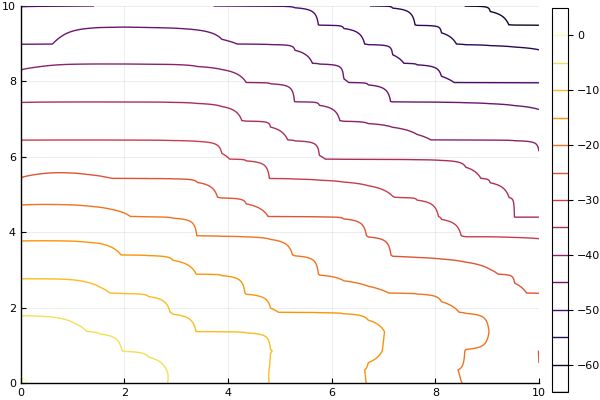

In [151]:
contour(vns, vps, log10.(z .+ 1e-314))

In [130]:
min(Rrate_murca_p)

MethodError: MethodError: no method matching min(::Array{Float64,2})
Closest candidates are:
  min(::Any, !Matched::Missing) at missing.jl:100
  min(::Any, !Matched::Any) at operators.jl:414
  min(::Any, !Matched::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  ...

In [53]:
log10.(z .+ 1e-314)

1001×1001 Array{Float64,2}:
   -0.589895     -0.49982      -0.421207    …  -314.0  -314.0  -314.0  -314.0
   -0.534929     -0.446805     -0.369704       -314.0  -314.0  -314.0  -314.0
   -0.486144     -0.399563     -0.323666       -314.0  -314.0  -314.0  -314.0
   -0.442291     -0.35696      -0.282044       -314.0  -314.0  -314.0  -314.0
   -0.402462     -0.318165     -0.244065       -314.0  -314.0  -314.0  -314.0
   -0.365981     -0.282554     -0.209141    …  -314.0  -314.0  -314.0  -314.0
   -0.322474     -0.240373     -0.168006       -314.0  -314.0  -314.0  -314.0
   -0.279766     -0.198941     -0.127584       -314.0  -314.0  -314.0  -314.0
   -0.240884     -0.16112      -0.0906059      -314.0  -314.0  -314.0  -314.0
   -0.205199     -0.12633      -0.0565309      -314.0  -314.0  -314.0  -314.0
   -0.172224     -0.0941214    -0.0249361   …  -314.0  -314.0  -314.0  -314.0
   -0.13542      -0.0583687     0.00776433     -314.0  -314.0  -314.0  -314.0
   -0.0952527    -0.0194754     0.04

In [138]:
Rrate_murca_p_spl(1., 0.3)

0.11520073141749268

In [209]:
x = 0.72 #log10(12.)
@show x
@show ceil(x, digits=1)
@show floor(x, digits=1)

x = 0.72
ceil(x, digits=1) = 0.8
floor(x, digits=1) = 0.7


0.7

In [210]:
(logxis .< (x+0.1)) .& (logxis .>= x)

21-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [211]:
(logxis .> (x-0.1)) .& (logxis .<= x)

21-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [166]:
logxis = 0:0.1:2

0.0:0.1:2.0

In [215]:
min(vp_xi_murca_n[:,1]...)

0.0

In [226]:
Rrate_murca_p_spls = [Spline2D(vn_xi_murca_n[:,1], vp_xi_murca_n[:,1], 
        readdlm("../output_data/Rrate_murca_p_SFnp_nonzeroT_logxi_$(logxi).dat", Float64, comments=true), kx=1, ky=1)
    for logxi=logxis];

In [231]:
Rrate_murca_p_spls[(logxis .> (x-0.1)) .& (logxis .<= x)][1]

Spline2D([0.0, 0.0, 0.0175439, 0.0350877, 0.0526316, 0.0701754, 0.0877193, 0.105263, 0.122807, 0.140351  …  5.93721, 6.44506, 6.95291, 7.46076, 7.96861, 8.47645, 8.9843, 9.49215, 10.0, 10.0], [0.0, 0.0, 0.0526316, 0.105263, 0.157895, 0.210526, 0.263158, 0.315789, 0.368421, 0.421053  …  6.23269, 6.7036, 7.17452, 7.64543, 8.11634, 8.58726, 9.05817, 9.52909, 10.0, 10.0], [0.976736, 0.975786, 0.973233, 0.967927, 0.959564, 0.947965, 0.933007, 0.914593, 0.892661, 0.867226  …  3.55475e-30, 2.9134e-31, 1.0405e-32, 4.83241e-35, 1.31321e-37, 3.43387e-40, 9.26818e-43, 2.36341e-45, 6.27817e-48, 2.60561e-50], 1, 1, 0.0)

In [266]:
function Rrate_murca_p_intp(vn, vp, xi)
    logxi = log10(xi)
    idx1 = (logxis .> (logxi-0.1)) .& (logxis .<= logxi)
    idx2 = (logxis .< (logxi+0.1)) .& (logxis .>= logxi)

    if logxi<0.0 || logxi>2.0 || vn>max(vn_xi_murca_p...) || vp>max(vp_xi_murca_p...)
        return 0.0
    
    elseif idx1 == idx2
        return Rrate_murca_p_spls[idx1][1](vn, vp)
        
    else 
        logxi1 = logxis[idx1][1]
        logxi2 = logxis[idx2][1]
        @show logxi1, logxi2
        R1 = Rrate_murca_p_spls[idx1][1](vn, vp)
        R2 = Rrate_murca_p_spls[idx2][1](vn, vp)
        
        #return R1 + (R2-R1)/(logxi2-logxi1) * (logxi - logxi1)
        return R1 + (R2-R1)/(exp10(logxi2)-exp10(logxi1)) * (xi - exp10(logxi1))
    end
end

Rrate_murca_p_intp (generic function with 1 method)

In [267]:
Rrate_murca_p_intp(0.2, 0.2, 2.)

(logxi1, logxi2) = (0.3, 0.4)


0.9067384814750743

In [265]:
Rrate_murca_p_spls[4](0.2,0.2)

0.9072721025017599

In [259]:
log10(17.)

1.2304489213782739